# 다양체 학습 (Manifold Learning)

* 높은 차원의 데이터를 저차원으로 축소하는 방법

![manifold](https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_0011.png)

* 고차원 데이터를 2차원 또는 3차원으로 축소해 시각화에 활용할 수 있음
* 차원 축소 과정에서 중요하지 않은 정보는 버려지고 중요한 정보만 남기 때문에 데이터 정제에 활용 가능

## 데이터 생성 및 시각화 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold, random_projection, datasets

In [2]:
s_curve, color = datasets.make_s_curve(1000, random_state=0)

In [3]:
digits, labels = datasets.load_digits(return_X_y=True)
rand_proj = random_projection.SparseRandomProjection(n_components=3, random_state=0)
projected_digits = rand_proj.fit_transform(digits)

In [4]:
def min_max_scale(x):
  min_value, max_value = np.min(x,0) , np.max(x,0)
  x = (x - min_value) / (max_value - min_value)
  return x

In [6]:
def plot_s_curve(s_curve, color, position, projection):
  s_curve = min_max_scale(s_curve)
  if projection == '3d':
    ax = plt.subplot(position, projection=projection)
    ax.scatter(s_curve[:,0], s_curve[:,1], s_curve[:,2],c=color, cmap= plt.cm.Spectral)
    ax.view_init(4,-72)
  elif projection == '2d':
    ax = plt.subplot(position)
    ax.scatter(s_curve[:,0], s_curve[:,1], c=color, cmap=plt.cm.Spectral)

In [12]:
def plot_digits(digits, labels, position, projection):
  digits = min_max_scale(digits)
  if projection == '3d':
    ax = plt.subplot(position, projection = projection)
    for i in range(digits.shape[0]):
      ax.text(digits[i,0],digits[i,1],digits[i,2], str(labels[i]),
              color=plt.cm.Set1(labels[i] / 10), fontdict={'weight':'bold','size':9})
    ax.view_init(4,-72)
  elif projection == '2d':
    ax = plt.subplot(position)
    for i in range(digits.shape[0]):
      ax.text(digits[i,0],digits[i,1], str(labels[i]),
              color=plt.cm.Set1(labels[i] / 10), fontdict={'weight':'bold','size':9})

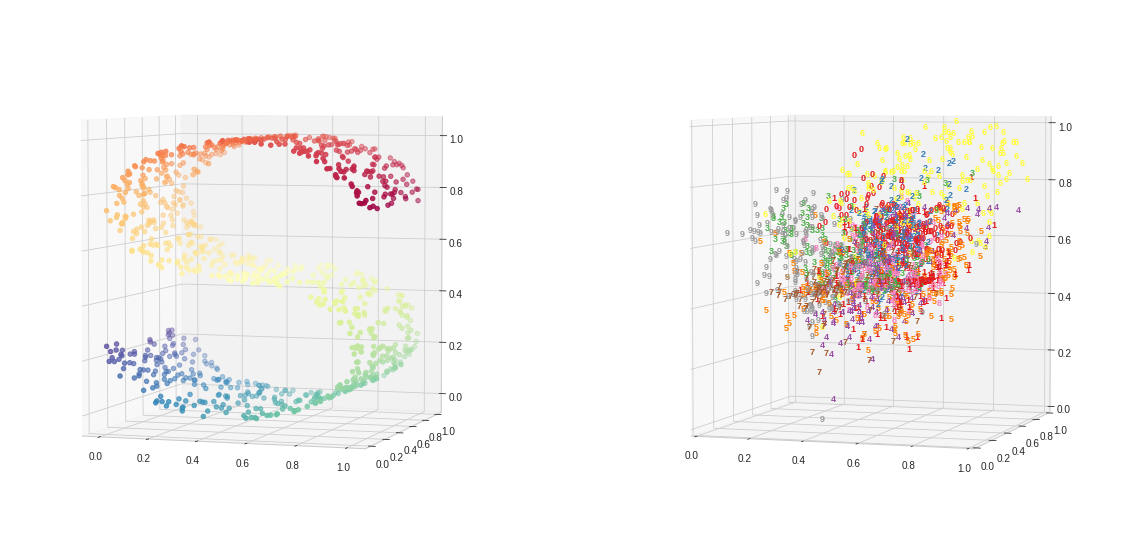

In [14]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve,color, 121, '3d')
plot_digits(projected_digits, labels, 122, '3d')

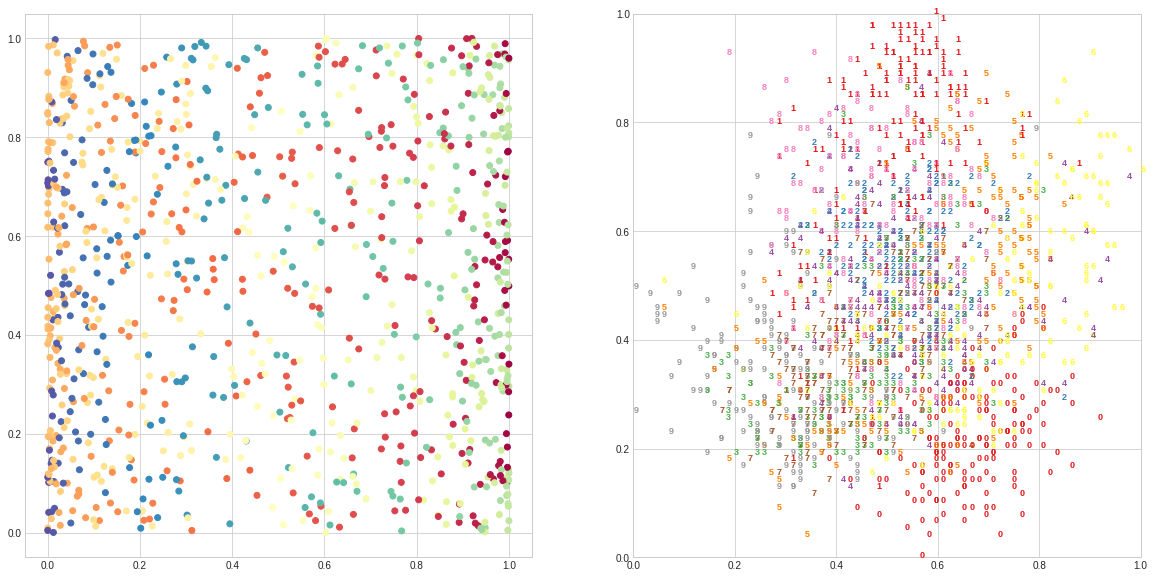

In [15]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve,color, 121, '2d')
plot_digits(projected_digits, labels, 122, '2d')

## Locally Linear Embedding (LLE)

* 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음

In [18]:
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='standard',random_state=0).fit_transform(s_curve)
digits_lle = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=3,
                                             method='standard', random_state=0).fit_transform(digits)

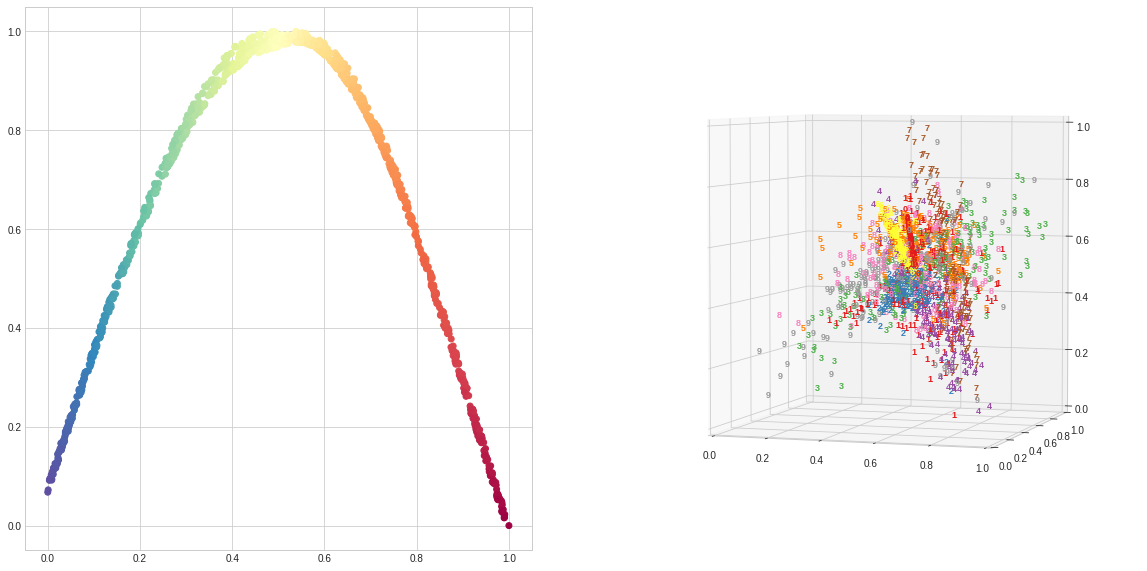

In [21]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_lle, color, 121, '2d')
plot_digits(digits_lle, labels, 122, '3d')

## Local Tangent Space Alignment (LTSA)

* 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화
* 국소 탄젠트 공간을 정렬

In [22]:
s_curve_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='ltsa',random_state=0).fit_transform(s_curve)
digits_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=3,
                                             method='ltsa', random_state=0).fit_transform(digits)

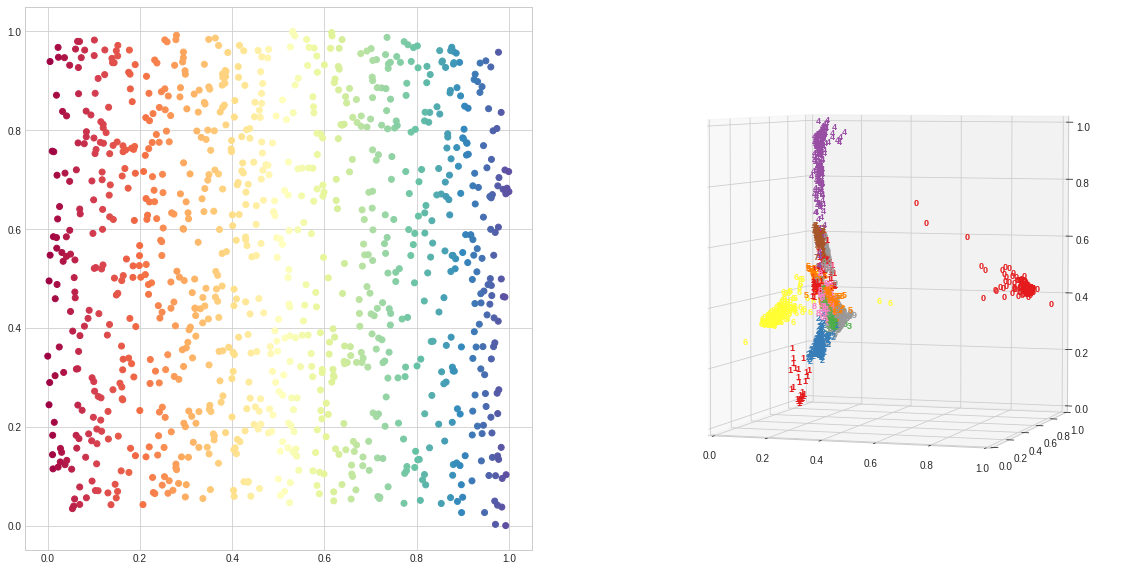

In [25]:
fig = plt.figure(figsize=(20,10)) 
plot_s_curve(s_curve_ltsa, color, 121, '2d')#s자를 펼쳐서
plot_digits(digits_ltsa, labels, 122, '3d')

## Hessian Eigenmapping

* LLE의 문제를 해결한 다른 방법
* 국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 이차 형태를 중심으로 회전

In [28]:
s_curve_hes = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='hessian',random_state=0).fit_transform(s_curve)
digits_hes = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=3,
                                             method='hessian', random_state=0).fit_transform(digits)

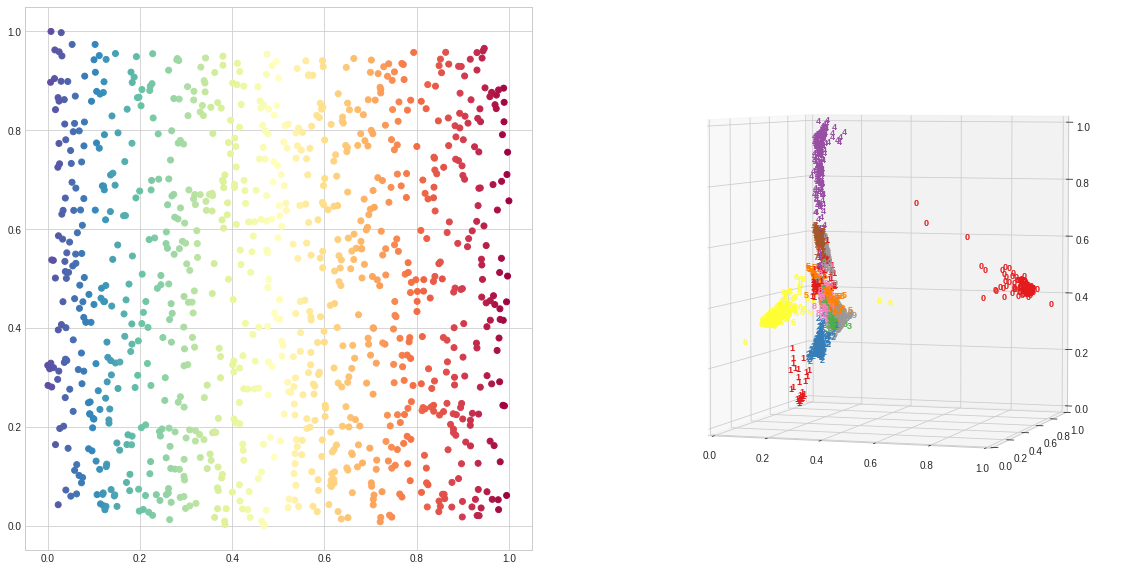

In [29]:
fig = plt.figure(figsize=(20,10)) 
plot_s_curve(s_curve_hes, color, 121, '2d')
plot_digits(digits_hes, labels, 122, '3d')

## Modified Locally Linear Embedding

* 각 이웃에 여러 가중치 벡터를 사용
* n_neighbors > n_components를 만족해야 함

In [30]:
s_curve_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='modified',random_state=0).fit_transform(s_curve)
digits_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=3,
                                             method='modified', random_state=0).fit_transform(digits)

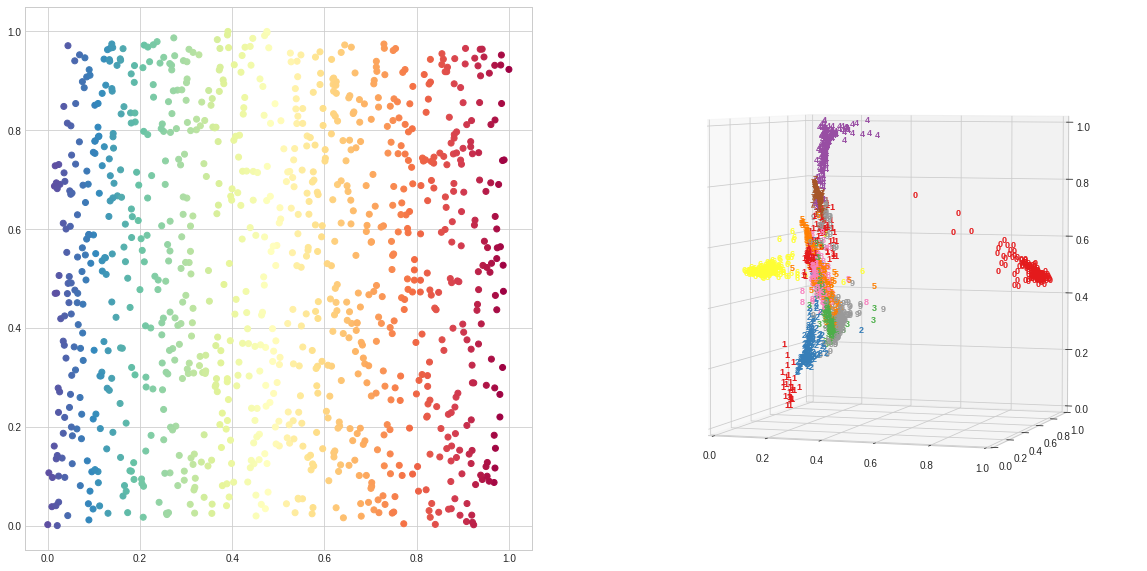

In [31]:
fig = plt.figure(figsize=(20,10)) 
plot_s_curve(s_curve_mlle, color, 121, '2d')
plot_digits(digits_mlle, labels, 122, '3d')

## Isomap

* 초기의 다양체 학습 알고리즘
* MDS와 커널 PCA의 확장으로 볼 수 있음
* 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

In [32]:
s_curve_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(s_curve)
digits_iso = manifold.Isomap(n_neighbors=30,n_components=3).fit_transform(digits)

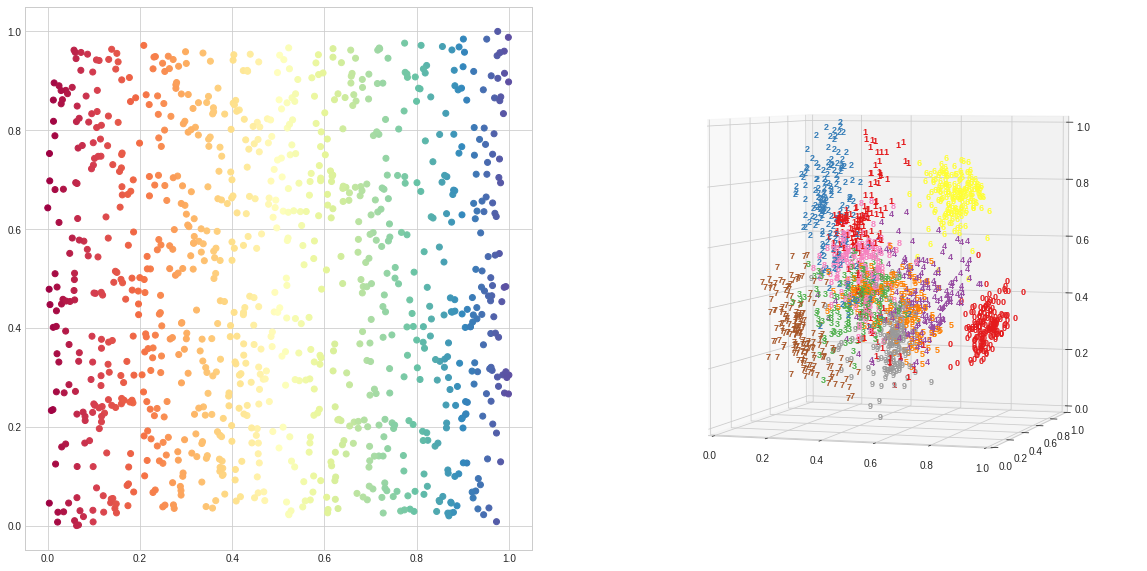

In [33]:
fig = plt.figure(figsize=(20,10)) 
plot_s_curve(s_curve_iso, color, 121, '2d')
plot_digits(digits_iso, labels, 122, '3d')

## Multi-Dimensional Scaling (MDS)

* 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음

In [36]:
s_curve_mds = manifold.MDS(n_components=2, random_state=0).fit_transform(s_curve)
digits_mds = manifold.MDS(n_components=3, random_state=0).fit_transform(digits)

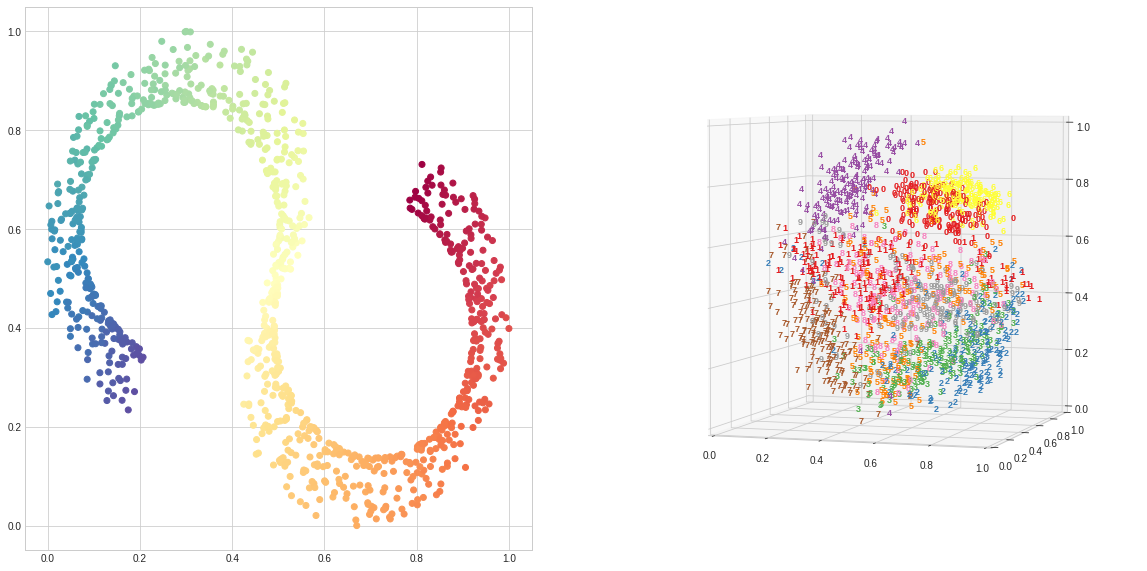

In [37]:
fig = plt.figure(figsize=(20,10)) 
plot_s_curve(s_curve_mds, color, 121, '2d')
plot_digits(digits_mds, labels, 122, '3d')

## Spectral Embedding

* 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
* 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

In [41]:
s_curve_spe = manifold.SpectralEmbedding(n_components=2, random_state=0).fit_transform(s_curve)
digits_spe = manifold.SpectralEmbedding(n_components=3, random_state=0).fit_transform(digits)

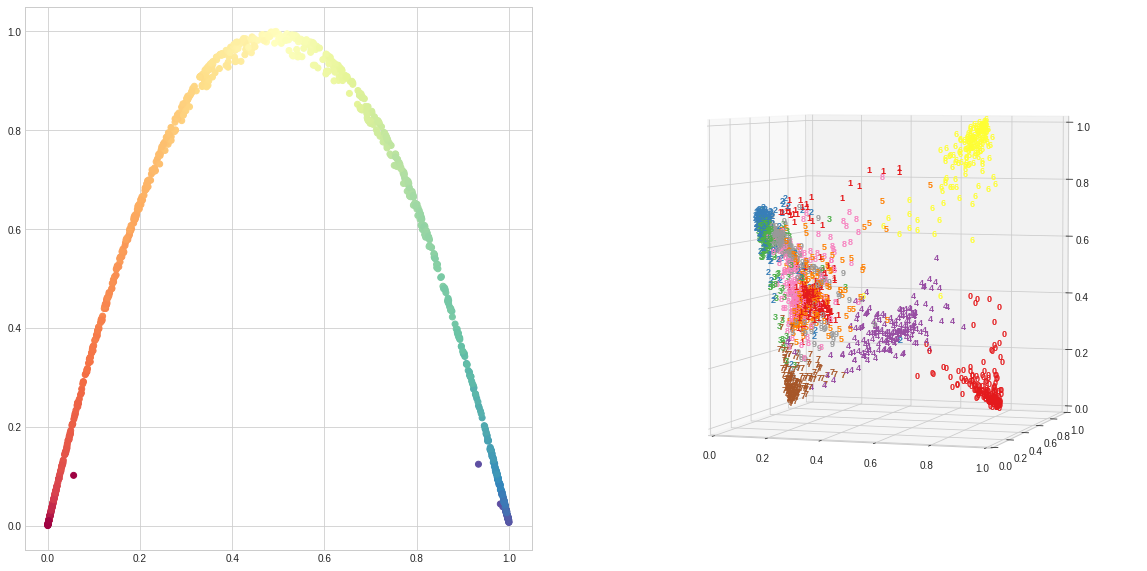

In [42]:
fig = plt.figure(figsize=(20,10)) 
plot_s_curve(s_curve_spe, color, 121, '2d')
plot_digits(digits_spe, labels, 122, '3d')

## t-distributed Stochastic Neighbor Embedding (t-SNE)

* 데이터 포인트의 유사성을 확률로 변환
* 국소 구조에 민감
* 국소 구조를 기반으로 샘플 그룹을 추출하는데 강함
* 항상 KL발산의 국소 최소값에서 끝남
* 계산 비용이 많이 듬
* 전역 구조를 보존하지 않음

In [43]:
s_curve_tsne = manifold.TSNE(n_components=2, random_state=0).fit_transform(s_curve)
digits_tsne = manifold.TSNE(n_components=3, random_state=0).fit_transform(digits)

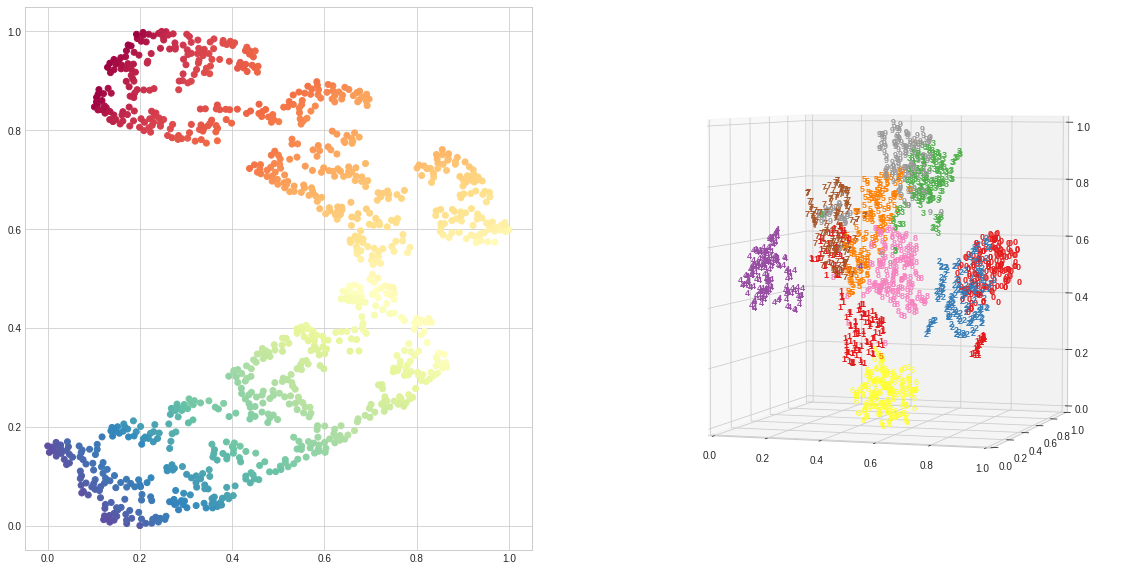

In [44]:
fig = plt.figure(figsize=(20,10)) 
plot_s_curve(s_curve_tsne, color, 121, '2d')
plot_digits(digits_tsne, labels, 122, '3d')

## 정제된 표현을 이용한 학습
* 다양체 학습의 결과를 정제된 데이터로 생각할 수 있음
* 정제된 표현이기 때문에 분석에 비교적 용이함
* 기계학습 모델의 입력으로 사용했을때 성능향상을 기대할 수 있음

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [46]:
raw_digits, target = datasets.load_digits(return_X_y=True)

In [53]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

### 원본 데이터를 사용할 때

#### KNN

In [48]:
score = cross_val_score(
    estimator = knn,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [49]:
print('mean cross val score: {} (+/- {})'.format(score.mean(),score.std()))

mean cross val score: 0.9627282575054161 (+/- 0.011168537355954218)


#### SVM

In [50]:
score = cross_val_score(
    estimator = svm,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [51]:
print('mean cross val score: {} (+/- {})'.format(score.mean(),score.std()))

mean cross val score: 0.9632838130609718 (+/- 0.02008605863225686)


#### Decision Tree

In [59]:
score = cross_val_score(
    estimator = decision_tree,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.79722222, 0.71944444, 0.79665738, 0.82451253, 0.7994429 ])

In [60]:
print('mean cross val score: {} (+/- {})'.format(score.mean(),score.std()))

mean cross val score: 0.787455896007428 (+/- 0.035559776939970145)


#### Random Forest

In [61]:
score = cross_val_score(
    estimator = svm,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [62]:
print('mean cross val score: {} (+/- {})'.format(score.mean(),score.std()))

mean cross val score: 0.9632838130609718 (+/- 0.02008605863225686)


### 정제된 데이터를 사용할 때

#### KNN

In [65]:
score = cross_val_score(
    estimator = knn,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.96111111, 0.96944444, 0.98885794, 0.99164345, 0.97214485])

In [66]:
print('mean cross val score: {} (+/- {})'.format(score.mean(),score.std()))

mean cross val score: 0.9766403590219745 (+/- 0.011726128697800348)


#### SVM

In [73]:
score = cross_val_score(
    estimator = svm,
    X=digits_lle, y=target,
    cv=5
)
score

array([0.60555556, 0.58333333, 0.62395543, 0.66295265, 0.6183844 ])

In [74]:
print('mean cross val score: {} (+/- {})'.format(score.mean(),score.std()))

mean cross val score: 0.6188362735995049 (+/- 0.026113217125373827)


#### Decision Tree

In [75]:
score = cross_val_score(
    estimator = svm,
    X=digits_mds, y=target,
    cv=5
)
score

array([0.79444444, 0.70833333, 0.77437326, 0.82172702, 0.76880223])

In [76]:
print('mean cross val score: {} (+/- {})'.format(score.mean(),score.std()))

mean cross val score: 0.7735360569483132 (+/- 0.037507425254198465)


#### Random Forest

In [77]:
score = cross_val_score(
    estimator = svm,
    X=digits_mlle, y=target,
    cv=5
)
score

array([0.80277778, 0.80555556, 0.80222841, 0.84401114, 0.79387187])

In [78]:
print('mean cross val score: {} (+/- {})'.format(score.mean(),score.std()))

mean cross val score: 0.8096889507892293 (+/- 0.017599442487524004)
